In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Bootstrap <a class='tocSkip'></a>
## Estimate statistical uncertainties <a class='tocSkip'></a>
## Version 0.1 - May 2019 (English)<a class='tocSkip'></a>

> Bootstrapping is a method to estimate the statistical uncertainty of some quantity when 
> straight-forward error propagation is not feasible.  In this note, we will investigate the 
> technique of bootstrapping through example using Python
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python


### Niels Bohr Institutet <a class='tocSkip'></a>

# Introduction

The technique of bootstrapping is a way to estimate the _statistical uncertainty_ of some quantity.  It is most often used when the variance of the quantity (or more formally _estimator_) is not feasible to calculate directly from the data.  Some examples are 

- The median of a variable 
- Correlation coefficient between two variables 

or more complicated quantities such as the azimuthal anisotropic flow calculated from so-called $Q$-cumulants (see f.eks. [here](http://gitlab.com/cholmcc/mcorrelations)).  That is, if we are estimating a simple quantity like the mean of a sample, we would _not_ use the bootstrap method, since the variance of the mean 

$$\operatorname{Var}[\bar{x}] = \frac{\operatorname{Var}[x]}{N}\quad,$$

with sample size $N$, is easily computed from the sample directly. 

# The method

The method of bootstrapping was invented by Bradly Efron (see for example L.Wasserman [All of Statistics](http://www.stat.cmu.edu/~larry/all-of-statistics/), Chapter 8), goes roughly like this 

- Suppose we are interested in the quantity $T$ calculated over the data $X$ (more formally, 
  $T$ is a _statistics_).  We estimate $T$ via the estimator $\hat{T}$ over the sample 
  $X_1,X_2,\ldots X_N$, of size $N$. We are interested in estimating the variance $\operatorname{Var}(T(X))$ 
- First, estimate the $T$ over our sample $X$
- Secondly, for some number of iterations $B$, do 
  - Select, at random _with_ replacement, $N$ samples from the original sample 
  - Calculate the estimate $T$ over this sample 
- Finally, calculate the variance of $T$ estimated over the $B$ generated samples. 

The underlying reasoning hinges on the law of large numbers, which says that for sufficiently large number of independent identitical distributed variable the distribution will tend to a normal distribution.  Thus, by making $B$ (a large number) of simulations, we can approximate the original estimator variance by the variance of the simulations. 

Each simulation is performed by sampling the original sample $X_1,X_2,\ldots,X_N$ exactly $N$ times with replacement.  By _with replacement_ we mean that the probability to draw $X_i$ is exactly $1/N$ for all $N$ samples in the simulation.  Thus, in our simulation sample the multiplicty  of any $X_i$ is anywhere from 0 to N. 

# Implementation 

We can implement a general solution to the bootstrap method in Python.  The first thing we need is the ability to make our simulation samples.  Here, we can use the standard function `random.choices`. To see this, let us pick as the sample the numbers between 0 and 9 (inclusive), and make some simulation samples 

In [2]:
import random 
random.seed(123456)
data = list(range(10))
for _ in range(5):
    print(random.choices(data,k=len(data)))

[8, 7, 0, 1, 0, 6, 0, 2, 1, 2]
[4, 1, 0, 9, 3, 6, 3, 8, 7, 4]
[4, 8, 5, 5, 8, 0, 7, 0, 5, 0]
[8, 7, 5, 4, 7, 3, 3, 2, 1, 8]
[2, 2, 1, 9, 4, 3, 9, 0, 4, 1]


Secondly, our solution will need to accept some estimator function $\hat T$ to operator on our simulation samples.  We will simple take that as an argument in form of a callable.  The final input to our solution in the choice of number of simulations $B$.  Since we may want to calculate other statistics than the variance on our bootstrap sample, we will return the entire list of $B$ estimates of $T$ over all simulations.  Thus, our solution becomes 

In [3]:
def bootstrap(data,estimator,size=1000,*args):
    """Perform the bootstrap simulation run. 
    
    Parameters
    ----------
    data : 
        The data to analyse. This can be any indexable object. That is, we must be 
        able to do
        
        >>> v = data[i]
        
    estimator : callable 
        This function is evaluated over data (with the same type as the data argument) 
        repeatedly to calculate the estimator on the bootstrap simulation.  It must
        accept a single argument of the same type as data.  Additional arguments can 
        be passed in the args argument. 
    size : int, positive 
        The number of bootstrap simulations.  This number should be large (>1000). 
    *args : dict 
        Additional arguments to pass to estimator function 
    
    Returns
    -------
    value : generator
        The estimator function evaluated over size bootstrap simulations. One can 
        calculate the variance of this list to get the estimate of the estimator 
        variance 
    """
    from random import choices 
    
    def _inner(data,estimator):
        """Inner function to generate simulation sample and evaluate the estimator"""
        return estimator(choices(data,k=len(data)),*args)

    return (_inner(data,estimator) for _ in range(size)) 

Thus, to calculate the bootstrap estimate of the variance of an estimator, we simply pass in our indexable data and our estimator function, get back a generator (which we can evaluate immediately using `list`, if needed) on which we can calculate the variance.  

# Intermezzo - some helpers

Below we want to calculate the variance and quantiles of samples, so we will define a few helper functions.  The first one will return the mean and the variance of a sample  

In [4]:
def meanVar(x,ddof=0):
    n = len(x)
    m = sum(x)/n
    v = sum([(xx-m)**2 for xx in x])/(n-ddof)
    return m,v

Again, we could have used _NumPy_ for this, but for the sake of illustration we code it up ourselves.  Let us make a sample $\sim U(0,1)$ and calculate the mean (0.5) and variance (1/12):

In [5]:
m, v = meanVar([random.random() for _ in range(1000)])
print('{:.3f} +/- {:.3f} (expect {:.3f} and {:.3f})'.format(m,v,.5,1/12))

0.500 +/- 0.082 (expect 0.500 and 0.083)


The next function will calculate the $\alpha$ quantile of a sample.  Essentially what we need to do is order the data and return the element at index $\alpha N$ where $N$ is the number of samples. 

In [6]:
def quantile(x,alpha,key=None):
    return sorted(x,key=key)[int(alpha*len(x))]

Let us try this on a sample $\sim N(0,1)$

In [7]:
x = [random.normalvariate(0,1) for _ in range(100)]
print(' 5% quantile: {:+.3f}'.format(quantile(x,.05)))
print('50% quantile: {:+.3f}'.format(quantile(x,.50)))
print('95% quantile: {:+.3f}'.format(quantile(x,.95)))

 5% quantile: -1.807
50% quantile: -0.103
95% quantile: +2.103


# Example

The following example is due to Bradly Efron (reproduced in L.Wasserman [All of Statistics](http://www.stat.cmu.edu/~larry/all-of-statistics/), Chapter 8).  A law school is interested in the correlation between LSAT ([Law School Achievement Test](https://www.lsac.org/lsat)) and GPA ([Grade Point Average](https://en.wikipedia.org/wiki/Grading_in_education#United_States)) scores.  That is 

$$
\hat\theta = \frac{\sum_i(Y_i-\bar Y)(Z_i-\bar Z)}{
  \sqrt{\sum_i(Y_i-\bar Y)^2}\sqrt{\sum_i(Z_i-\bar Z)^2}}\quad,
$$

where $Y$ is the LSAT score, and $Z$ the GPA score. First, let us get some data to work on.

In [8]:
lsat=[576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594]
gpa =[3.39,3.30,2.81,3.03,3.44,3.07,3.00,3.43,3.36,3.13,3.12,2.74,2.76,2.88,2.96]

Here, we have 15 samples of correlated LSAT and GPA scores.  

We need a function calculate the correlation $\hat\theta$

In [9]:
import math
def corr(y,z):
    ym,yv = meanVar(y)
    zm,zv = meanVar(z)
    num   = sum([(yi-ym)*(zi-zm) for yi,zi in zip(y,z)])/len(y)
    den   = math.sqrt(yv)*math.sqrt(zv)
    theta = num / den
    return theta

We could have used _NumPy_ here to perform this calculation more easily, but for the sake of illustration we write it out. 

Now, our general `bootstrap` function expects the callable to take a single data argument, so we will wrap `corr` in another function below.  Let us write a function that calculates $\hat\theta$ and estimates the standard deviation of $\hat\theta$ using the bootstrap method. 

In [10]:
def corrLsatGpa(lsat,gpa,b=1000):
    def est(data):
        """Wrapper"""
        y = [lsat for lsat,_ in data]
        z = [gpa  for _,gpa  in data]
        return corr(y,z)

    theta   = corr(lsat,gpa)  # The estimate 
    data    = [[lsat,gpa] for lsat,gpa in zip(lsat,gpa)]  # Retructure
    boot    = list(bootstrap(data,est,b))  # Get the bootstrap estimates 
    bm, bv  = meanVar(boot)
    return theta,math.sqrt(bv),boot

The function above returns 

- $\hat\theta$ the estimate of the correlation, 
- $\widehat{\mathrm{se}}(\hat\theta)=\sqrt{\operatorname{Var}^{\mathrm{boot}}[\hat\theta]}$ the bootstrap estimate of the standard deviation, and  
- the estimates of $\hat\theta$ over the bootstrap simulations. 

The last return value is mainly done in the interest of visualising the simulation.   Let us run the example and plot 

- The correlation of the LSAT and GPA score 
- The bootstrap estimates of $\hat\theta$ together with the estimates 

Let's make a function to plot results

In [11]:
import matplotlib.pyplot as plt 
def plot1(ax,data,theta,se,label):
    b,_,_ = ax.hist(data, density=True, alpha=.5,label=label,histtype='step')
    t     = max(b)
    ax.plot([theta,theta],[0,t],'--r',label='Estimate')
    ax.fill_between([theta-se,theta+se],[t,t],alpha=.5,
                    label=r'$\widehat{\mathrm{se}}$',color='y')
    ax.set_xlabel(r'$\hat\theta$')
    ax.legend()
    print('{:10s} {:.5f} +/- {:.5f}'.format(label, theta, se))

Correlation between LSAT and GPA: 0.776 +/- 0.132
Bootstrap  0.77637 +/- 0.13242


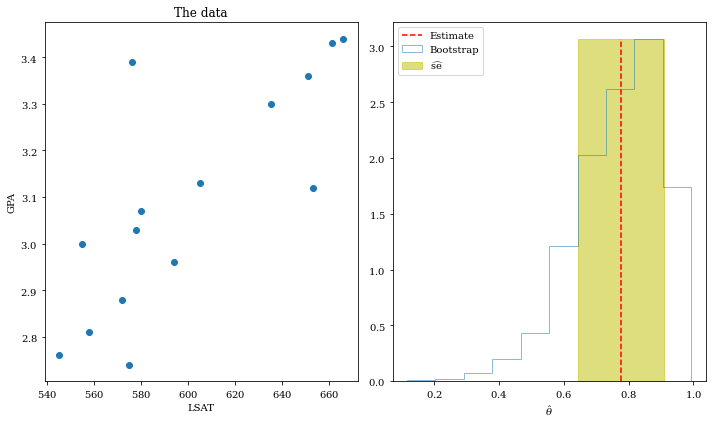

In [12]:
theta, std, boot = corrLsatGpa(lsat,gpa)
print('Correlation between LSAT and GPA: {:.3f} +/- {:.3f}'.format(theta,std))

fig, ax = plt.subplots(ncols=2,figsize=(10,6))

ax[0].plot(lsat,gpa,'o')
ax[0].set_xlabel('LSAT')
ax[0].set_ylabel('GPA')
ax[0].set_title('The data')
plot1(ax[1],boot,theta,std,'Bootstrap')
fig.tight_layout();

# Simulating

It is worth noting, that the method of bootstrapping is based on the law or large numbers.  That is what necessitates that we perform a relative large number of simulations to get an estimate of the variance of our estimator.  

To see this, let us run the above example with a varying number of steps ranging from 3 to 10000 and then plot the estimated standard deviation as a function of the number of steps. 

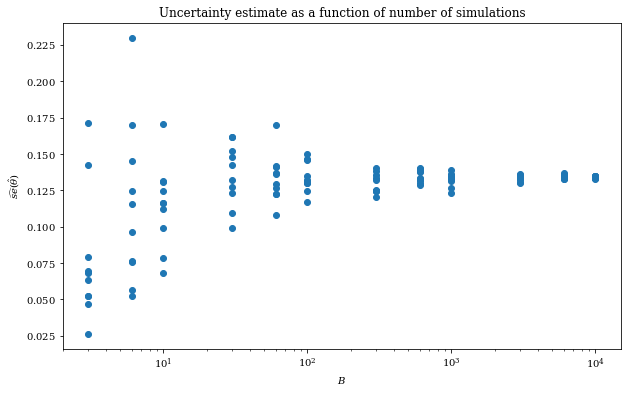

In [13]:
bs = [3, 6, 10, 30, 60, 100, 300, 600, 1000, 3000, 6000, 10000]
ob = []
os = []
for b in bs:
    ob.append([b]*10)
    os.append([corrLsatGpa(lsat,gpa,b)[1] for _ in range(10)])

plt.figure(figsize=(10,6))
plt.scatter(ob,os)
plt.xscale('log')
plt.xlabel('$B$')
plt.ylabel(r'$\widehat{se}(\hat\theta)$')
plt.title('Uncertainty estimate as a function of number of simulations');

The exact shape of the curve depends on the state of the random number generator used by `random.choices`, but in general we see that the estimate of $\widehat{se}(\hat\theta)$ does not stabilize until $B$ is sufficiently large.  Thus, we _must_ ensure sufficiently large number of simulations when applying the bootstrap method, or our estimate of the variance of the estimator is wholly uncertain. 

# Confidence intervals

We can estimate confidence intervals from our bootstrap estimate of the variance in three ways 

## Normal confidence interval

In this method, we assume that the estimator is roughly normal, and we can give the standard $2\sigma$ confidence limits 

$$ \hat\theta - 2\widehat{se}(\hat\theta), \hat\theta + 2\widehat{se}(\hat\theta)\quad.$$

Let us code this up in a function.

In [14]:
def bootstrapNormalCL(theta,boot,z=2):
    """Calculate the normal confidence limits on the estimate 
    theta and bootstrap sample boot.  z specifies the number of 
    standard errors
    
    Parameters
    ----------
    theta : value 
        Estimate 
    boot : data 
        Bootstrap sample 
    z : factor 
        Number of standard errors 
        
    Return
    ------
    low, high : tuple 
        Confince interval 
    """
    _, var = meanVar(boot)
    se     = math.sqrt(var)
    return theta - z * se, theta + z * se

Let us calculate the confidence interval for the LSAT versus GPA example above 

In [15]:
nlim = bootstrapNormalCL(theta,boot)
print('Confidence limits (normal): {:.3f},{:.3f}'.format(*nlim))

Confidence limits (normal): 0.512,1.041


## Quantile confidence interval 

An alternative, which does not assume $\hat\theta$ is roughly normal, but will tend to underestimate the confidence range is to calculate the $\alpha$ and $1-\alpha$ quantiles.   That is, we quote the confidence limits as 

$$ Q_{\alpha}(\hat\theta), Q_{1-\alpha}(\hat\theta)\quad, $$

where $Q_{\alpha}$ is the $\alpha$ quantile of the bootstrap samples.   Again, we will code this up in a function. 

In [16]:
def bootstrapQuantileCL(theta,boot,alpha=0.05):
    """Calculate the quantile confidence limits on the estimate 
    theta and the bootstrap sample boot, where alpha is the percentile 
    below and above
    
    Parameters
    ----------
    theta : value 
        Estimate 
    boot : data 
        Bootstrap sample 
    alpha : percentage 
        Percentage below and above the confidence limits 
        
    Return
    ------
    low, high : tuple 
        Confidence interval 
    """
    return quantile(boot,alpha), quantile(boot,1-alpha)

Let us, again, calculate the 5% and 95% confidence limits on the LSAT versus GPA example above 

In [17]:
qlim = bootstrapQuantileCL(theta,boot,0.05)
print('Confidence limits (quantile): {:.3f},{:.3f}'.format(*qlim))

Confidence limits (quantile): 0.531,0.950


## Pivotal confidence interval 

This method uses the estimate $\hat\theta$ and the $\alpha$ quantiles of the bootstrap simulations, and give the confidence limits as 

$$ 2\hat\theta - Q_{1-\alpha}(\hat\theta), 2\hat\theta - Q_{\alpha}(\hat\theta)\quad,$$

where $Q_{\alpha}$ is the $\alpha$ quantile of the bootstrap samples.  We code this up in a function.

In [18]:
def bootstrapPivotCL(theta,boot,alpha=0.05):
    """Calculate the quantile confidence limits on the estimate 
    theta and the bootstrap sample boot, where alpha is the percentile 
    below and above
    
    Parameters
    ----------
    theta : value 
        Estimate 
    boot : data 
        Bootstrap sample 
    alpha : percentage 
        Percentage below and above the confidence limits 
        
    Return
    ------
    low, high : tuple 
        Confidence interval 
    """
    return 2*theta - quantile(boot,1-alpha),2*theta-quantile(boot,alpha)    

And, we use this on the example above 

In [19]:
plim = bootstrapPivotCL(theta, boot, 0.05)
print('Confidence limits (pivot): {:.3f},{:.3f}'.format(*plim))

Confidence limits (pivot): 0.603,1.022


For comparison we will plot these limits together 

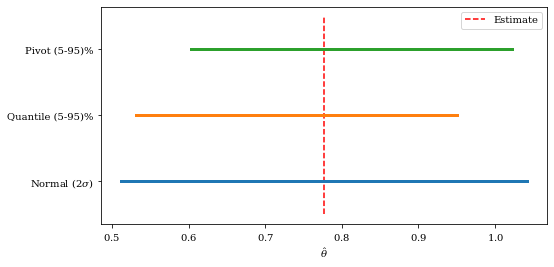

In [20]:
plt.figure(figsize=(8,4))

plt.plot([theta,theta],[-.5,2.5],'--r',label='Estimate')
for i, l in enumerate([nlim,qlim,plim]):
    plt.plot(l,[i,i],'-',lw=3)
plt.yticks([0,1,2],[r'Normal ($2\sigma$)',
                    'Quantile (5-95)%',
                    'Pivot (5-95)%'])
plt.xlabel(r'$\hat\theta$')
plt.legend();

We note that the normal and pivot confidence limits exceed 1 on the high end, which indicate that these two estimates tend to overestimate the size of the confidence interval.  The quantile confidence limits, on the other hand is probably on the low side, but does reflect the distribution of the bootstrap sample in this example. 

# Another example 

This example comes from the exercises of L.Wasserman [All of Statistics](http://www.stat.cmu.edu/~larry/all-of-statistics/), Chapter 8.  

We have a sample of 100 observations $X \sim N(5,1)$, and we are interested in the statistics $\theta = e^\mu$, for which we will use the estimator $\hat\theta = e^{\bar{X}}$.  We will use the bootstrap method to calculate the standard uncertainty and 95% confidence limits on $\hat\theta$. 

First, let us make our sample, and calculate our estimator 

In [21]:
data = [random.normalvariate(5,1) for _ in range(100)]
theta = math.exp(sum(data)/len(data))
print('hat(theta) = {:.2f}'.format(theta)) 

hat(theta) = 169.10


Next, we generate our bootstrap sample and calculate the standard uncertainty and confidence limits using all three methods above and plot them with the distribution of $e^{X}$ as well as the bootstrap distribution.

Bootstrap  169.10419 +/- 16.40896
Normal     confidence limits: 136.29 - 201.92
Quantile   confidence limits: 143.82 - 197.33
Pivot      confidence limits: 140.88 - 194.39


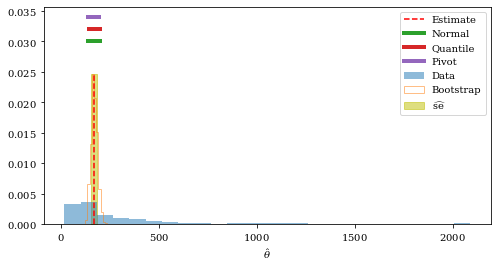

In [22]:
boot = list(bootstrap(data,lambda d:math.exp(sum(d)/len(d))))
_, var = meanVar(boot)

plt.figure(figsize=(8,4))
plt.hist([math.exp(x) for x in data],25,alpha=.5,density=True,label='Data')
plot1(plt.gca(),boot,theta,math.sqrt(var),'Bootstrap')

cln = ['Normal','Quantile','Pivot']
clm = [bootstrapNormalCL,bootstrapQuantileCL,bootstrapPivotCL]
for n, m, y in zip(cln,clm,[.03, .032, .034]):
    l = m(theta,boot)
    plt.plot(l,[y,y],'-',lw=4,label=n)
    print('{:10s} confidence limits: {:.2f} - {:.2f}'.format(n,*l))
    
plt.legend();

We immediately see that the bootstrap sample is much more narrowly centred around the estimate, and the width of the distribution reflect well the expected variance 

$$\operatorname{Var}[\theta] \approx \left(\frac{\partial\theta}{\partial \bar x}\right)^2\delta^2 \bar x 
= e^{2\bar{x}}\operatorname{Var}[\bar x]
= e^{2\bar{x}}\frac{\operatorname{Var}[x]}{N}
\quad,$$

which, taking the square root, evaluates to 

In [23]:
mx, vx = meanVar(data)
print('{:.3f}'.format(math.sqrt(math.exp(mx)**2*vx/len(data))))

15.820


# Another (simpler) approach - Jackknife

This approach was developed by Maurice Quenouille (see appendix to L.Wasserman [All of Statistics](http://www.stat.cmu.edu/~larry/all-of-statistics/), Chapter 8) and predates the bootstrap method.  The idea is again to use the observed data to simulate variations in the sample and then estimate the sample variance from these simulations. 

- Suppose we are interested in the quantity $T$ calculated over the data $X$ (more formally, 
  $T$ is a _statistics_).  We estimate $T$ via the estimator $\hat{T}$ over the sample 
  $X_1,X_2,\ldots X_N$, of size $N$. We are interested in estimating the variance $\operatorname{Var}(T(X))$ 
- First, estimate the $T$ over our sample $x$
- Secondly, for $N$ iterations, we do
  - For the $i^{\mathrm{th}}$ iteration, calculate the estimate $T$ leaving out the $i^{\mathrm{th}}$ 
    data point.  That is we take the sample $X_1,\ldots,X_{i-1},X_{i+1},\ldots,X_N$ and calculate the 
    estimate on that sample
- Finally, calculate the variance of $T$ estimated over the $N$ generated samples given by 

  $$\operatorname{Var}[T] = \frac{N-1}{N}\sum_i^{N} \left(T_i - \bar{T}\right)^2\quad,$$
  
  where $T_i$ is the estimate calculated over the $i^{\mathrm{th}}$ jackknife sample and $\hat{T}$ is 
  the mean of the estimate calculated over all jackknife samples. 

We can code this up in a general function.  As before, we expect an indexable data set and a function to calculate the estimator. 

In [24]:
def jackknife(data,estimator,*args):
    """Generate the jackknife samples and evaluate the estimator over
    these.  
    
    Parameters
    ----------
    data : 
        The data to calculate the jackknife samples over 
    estimator : callable 
        The function to calculate the estimator 
        
    Returns
    -------
    jack : 
        The estimator calculated over all jackkknife samples 
    """
    def _inner(data,estimator,i):
        return estimator((data[j] for j in range(len(data)) if j != i),*args)
    
    return (_inner(data,estimator,i) for i in range(len(data)))

## Example - LSAT versus GPA

Let us apply this method to our example above of the correlation between LSAT and GPA

In [25]:
def jkLsatGpa(lsat,gpa):
    def est(data):
        """Wrapper"""
        d = list(data)
        y = [lsat for lsat,_ in d]
        z = [gpa  for _,gpa  in d]
        return corr(y,z)

    theta   = corr(lsat,gpa)  # The estimate 
    data    = [[lsat,gpa] for lsat,gpa in zip(lsat,gpa)]  # Retructure
    jk      = list(jackknife(data,est))  # Get the bootstrap estimates 
    jm, jv  = meanVar(jk)
    return theta,math.sqrt(jv*(len(data)-1)),jk

We run this example and compare to the previous result of $0.776\pm 0.127$

LSAT versus GPA correlation: 0.776 +/- 0.143
Jackknife  0.77637 +/- 0.14252


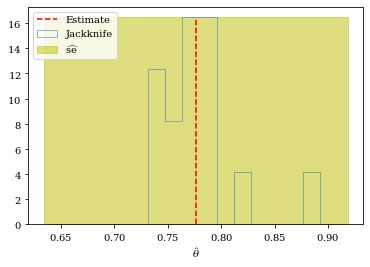

In [26]:
theta, std, jk = jkLsatGpa(lsat,gpa)
print("LSAT versus GPA correlation: {:.3f} +/- {:.3f}".format(theta,std))

plt.figure()
plot1(plt.gca(),jk,theta,std,'Jackknife')

## Example - generated data

We use the jackknife method on our generated data from above.  First, we calculate our estimate $\hat\theta=e^{\bar{X}}$ of the sample $X\sim N(5,1)$

In [27]:
theta = math.exp(sum(data)/len(data))

which is clearly the same as before, and then we perform our jackknife analysis to finde the variance.  We plot the result as before 

Jackknife  169.10419 +/- 15.88762


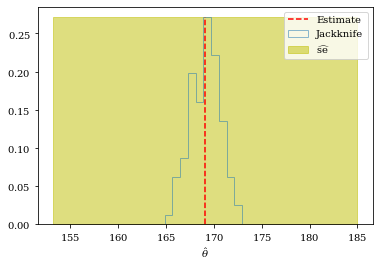

In [28]:
def est(data):
    d = list(data)
    return math.exp(sum(d)/len(d))
jk = list(jackknife(data,est))
_, var = meanVar(jk)
std = math.sqrt(var*(len(data)-1))
plot1(plt.gca(),jk,theta,std,'Jackknife')

Clearly, the jackknife method does not produce as wide simulated distributions as the bootstrap method does, and consequently, the estimates of the variance are more uncertain.  If possible, one should opt for the bootstrap method over the jackknife method.  

# When **not** to do bootstrap or jackknife

## A simple estimator 
Suppose we have analysed millions of events $\{E_1,\ldots\}$ for a particular observable $X$.  We have split our events $E_i$ into $N$ sub-samples 

$$
\bigcup_i^N S_i = \{E_1,\ldots\}\quad,
$$

and calculated $X$ in each of these sub-samples.  We thus have the sample 

$$\{X_1,\ldots,X_N\}\quad.$$ 

All the observations $X_i$ are independent identically distributed (iid) random variable, in that 

$$\forall i,j\in\{1,\ldots,N\}\wedge i\neq j: S_j \cap S_i = \emptyset\quad,$$  

and the events $E_i$ are assumed to be equal ins some meaning of that word.  Thus, we want to estimate 
$\theta$ over and its variance.  Our estimator is then the mean of the $N$ samples 

$$\hat\theta = \frac{1}{N}\sum_{i=1}^N X_i\quad,$$ 

and we will use the bootstrap and jackknife methods for estimating the variance and standard uncertainty.

Here, we will choose $N=10$ and $X\sim N(0,1)$ without loss of generality.  Thus, we expect to find that 

$$\hat\theta = 0 \pm 0.1\quad.$$

Let us generate the data

In [29]:
data = [random.normalvariate(0,1) for _ in range(10)]

We can of course calculate the mean and the variance directly from this sample to obtained the sample mean and standard uncertainty 

In [30]:
m, v = meanVar(data,1)
e =  math.sqrt(v/len(data))
mes = '{:10s} mean = {:.3f} and variance = {:.3f} -> {:.3f} +/- {:.3f}'
print(mes.format('Sample', m, v, m, e))

Sample     mean = 0.070 and variance = 0.530 -> 0.070 +/- 0.230


Let us now use the bootstrap method to perform the calculation

In [31]:
def est(data):
    d = list(data)
    return sum(d)/len(d)
boot = list(bootstrap(data, est))
meanb, varb = meanVar(boot)
eb = math.sqrt(varb)
print(mes.format('Bootstrap', m, varb, m, eb))

Bootstrap  mean = 0.070 and variance = 0.048 -> 0.070 +/- 0.220


And finally we use the jackknife method 

In [32]:
jk = list(jackknife(data,est))
meanj, varj = meanVar(jk)
ej = math.sqrt(varj*(len(data)-1))
print(mes.format('Jackknife', m, varj, m, ej))

Jackknife  mean = 0.070 and variance = 0.006 -> 0.070 +/- 0.230


Let us plot the various samples 

Direct     0.07026 +/- 0.23028
Bootstrap  0.07026 +/- 0.21978
Jackknife  0.07026 +/- 0.23028


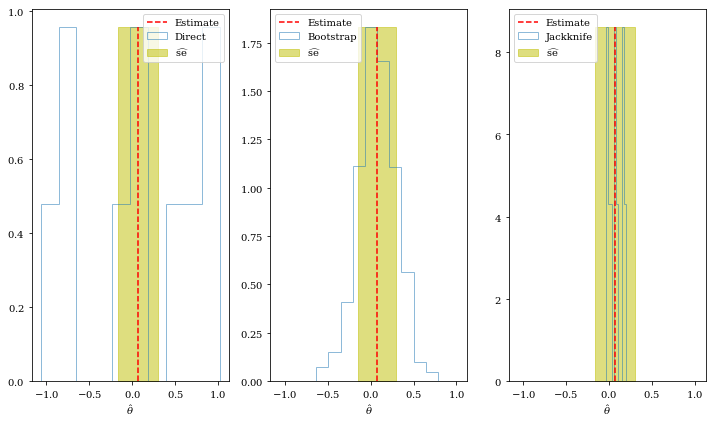

In [33]:
fig, ax = plt.subplots(ncols=3,figsize=(10,6),sharex=True)
plot1(ax[0], data, m, e,   'Direct')
plot1(ax[1], boot, m, eb,  'Bootstrap')
plot1(ax[2], jk,   m, ej,  'Jackknife')
fig.tight_layout()

As is clear from the results above, it makes little sense to use the bootstrap or jackknife methods for estimating the variance if the estimator in question is a simple estimator such as the mean. 

## A more complicated example

Suppose, again, we are analysing millions of events which we may split into some number $N$ of sub-samples.  For each sub-sample $i$ we calculate some quantity from which we will derive a complicated estimator $\hat\theta_i$.  This could for example be 

$$\hat\theta_i = \frac{-a + 2b}{c^3}\quad,$$

where $a$, $b$, and $c$ are calculated over the sub-samples.  The final estimator over the sub-samples is then the average 

$$\hat\theta = \frac{1}{N}\sum_i \hat\theta_i\quad.$$

Let us try to simulate this case.  We will generate 10000 events with 

- $a \sim N(1,1)$
- $b \sim N(5,1)$
- $c \sim N(3,1)$ 

from which we will select $N=10$ sub-samples and calculate the means of $a,b$, and $c$.

In [34]:
events = [(random.normalvariate(1,1),
          random.normalvariate(5,1),
          random.normalvariate(3,1))
          for _ in range(1000)]
data = list(zip(*[events[i::len(events)//10] 
                 for i in range(len(events)//10)]))
data = [(sum(a for a,_,_ in sub)/len(sub),
         sum(b for _,b,_ in sub)/len(sub),
         sum(c for _,_,c in sub)/len(sub)) 
        for sub in data]

Let us define the estimator function which calculates the average over $\hat\theta_i$, and evaluate it on the 10 subsamples 

In [35]:
def est(data):
    def _inner(a,b,c):
        return (-a + 2*b) / c**3
    d = list(data)
    return sum(_inner(a,b,c) for a,b,c in d)/len(d)

theta = est(data)
print('Estimator {}'.format(theta))

Estimator 0.3319428026358412


Let us do the bootstrap and jackknife methods to estimate the variance of $\hat\theta$, as well as direct estimate from the $N$ sub-sample results 

In [36]:
dirc = [(-a + 2*b)/c**3 for a,b,c in data]
dmean,dvar = meanVar(dirc)
dstd = math.sqrt(dvar / len(dirc))

boot = list(bootstrap(data,est))
bmean, bvar = meanVar(boot)
bstd = math.sqrt(bvar)

jack = list(jackknife(data,est))
jmean, jvar = meanVar(jack)
jstd = math.sqrt(jvar * (len(data)-1))

Sub-samples 0.33194 +/- 0.00882
Bootstrap  0.33194 +/- 0.00842
Jackknife  0.33194 +/- 0.00929


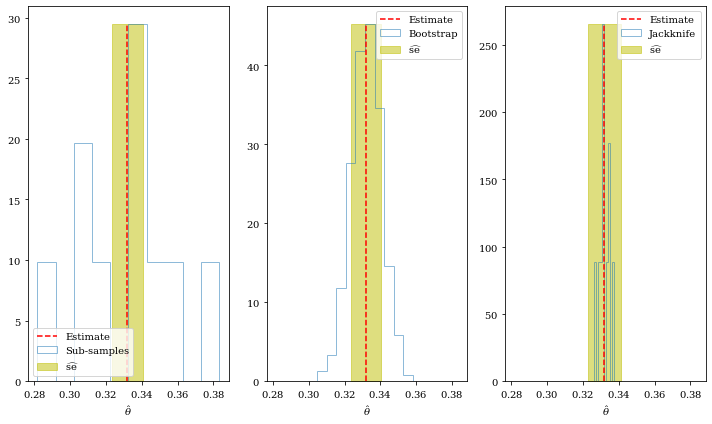

In [37]:
fig, ax = plt.subplots(ncols=3,figsize=(10,6),sharex=True)
plot1(ax[0],dirc,theta,dstd,'Sub-samples')
plot1(ax[1],boot,theta,bstd,'Bootstrap')
plot1(ax[2],jack,theta,jstd,'Jackknife')
fig.tight_layout()

Again, we see that the bootstrap and jackknife methods does not provide significant advantages over direct calculation of the variance from the $N$ sub-samples.   This is, of course, because the final estimator is a simple average of the sub-samples. 

## Estimates from full event data

We will continue the example above, where we however will store $a,b,c$ as calculated in _each_ event and our final estimator becomes 

$$\hat\theta = \frac{-\bar{a} + 2\bar{b}}{\bar{c}^3}\quad.$$ 

We will thus perform the bootstrap analysis by sampling new events from our empirical distributions of $a,b,$ and $c$ and calculate the estimator value for each of those samples.  Note, in this case, it is not easy to calculate the variance directly from the data, so we will refrain from doing so. 

We use the events generated above to do our estimate and variance estimates, but first, we need a function to calculate the mean of $a,b,$ and $c$ over all events.

In [38]:
def est(data):
    d = list(data)
    a = sum(aa for aa,_,_ in d) / len(d)
    b = sum(bb for _,bb,_ in d) / len(d)
    c = sum(cc for _,_,cc in d) / len(d)
    return (-a + 2*b) / c**3

Let us calculate the estimate 

In [39]:
theta = est(events)
print('Estimator: {}'.format(theta))

Estimator: 0.3304604423307452


Regular propagation of uncertainties, including covariance, gives 

\begin{align*}
\operatorname{Var}[\theta] &= 
  \left(-\frac{1}{\bar c^3}\right)^2\frac{\operatorname{Var}[a]}{N} + 
  \left(\frac{2}{\bar c^3}\right)^2\frac{\operatorname{Var}[b]}{N} +
  \left(-\frac{3(-\bar a+2\bar b)}{\bar c^4}\right)^2\frac{\operatorname{Var}[c]}{N}\\
  &\quad +
  2\left[\frac{-1}{\bar c^3}\frac{2}{\bar c^3}\frac{\operatorname{Cov}[a,b]}{N}+
    \frac{-1}{\bar c^3}\frac{-3(-\bar a+2\bar b)}{c^4}\frac{\operatorname{Cov}[a,c]}{N}+
    \frac{2}{\bar c^3}\frac{-3(-\bar a+2\bar b)}{c^4}\frac{\operatorname{Cov}[b,c]}{N}
    \right]
  \\
  &= 
  \frac{1}{\bar c^6 N}\left(\operatorname{Var}[a] + 
     4(\operatorname{Var}[b]-\operatorname{Cov}[a,b])+
     \frac{3}{\bar c}(-\bar a + 2\bar b)
     \left[
       \frac{3(-\bar a + 2\bar b)}{\bar c}\operatorname{Var}[c]+
       \operatorname{Cov}[a,c]-2\operatorname{Cov}[b,c]
     \right]
     \right)
  \quad,
\end{align*}
  
which we can calculate directly on the data

In [40]:
n           = len(data)
meana, vara = meanVar([aa for aa,_,_ in data])
meanb, varb = meanVar([bb for _,bb,_ in data])
meanc, varc = meanVar([cc for _,_,cc in data])
covab       = sum([(aa - meana)*(bb - meanb) for aa,bb,_ in data])/n
covac       = sum([(aa - meana)*(cc - meanc) for aa,_,cc in data])/n
covbc       = sum([(bb - meanb)*(cc - meanc) for _,bb,cc in data])/n
tmp         = 3*(-meana + 2*meanb)/meanc
dvar = 1/meanc**6/n * (vara + 4*(varb+covab) + tmp*(tmp*varc+covac-2*covbc))
dstd = math.sqrt(dvar)
print('{:10s} {:.5f} +/- {:.5f}'.format('Direct',theta,dstd))

Direct     0.33046 +/- 0.00884


We perform the bootstrap and jackknife analyses

In [41]:
boot = list(bootstrap(events,est))
jack = list(jackknife(events,est))
bmean, bvar = meanVar(boot)
jmean, jvar = meanVar(jack)
bstd = math.sqrt(bvar)
jstd = math.sqrt(jvar * (len(events)-1))

Direct     0.33046 +/- 0.00884
Bootstrap  0.33046 +/- 0.01103
Jackknife  0.33046 +/- 0.01103


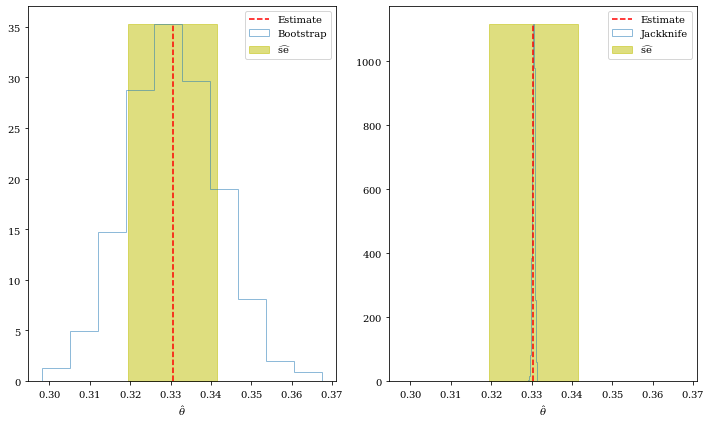

In [42]:
fig, ax = plt.subplots(ncols=2,sharex=True,figsize=(10,6))
print('{:10s} {:.5f} +/- {:.5f}'.format('Direct',theta,dstd))
plot1(ax[0],boot,theta,bstd,'Bootstrap')
plot1(ax[1],jack,theta,jstd,'Jackknife')
fig.tight_layout()

The 3 estimates all agree to one significant digit, and we see that even in this case we do better by evaluating the uncertainties directly. 

# Summary

The bootstrap and jackknife methods for estimating the variance of an estimator are powerful tools, but are _not_ generally applicable.  Here are some key take-aways 

- Bootstrap should be preferred over jackknife 
- Bootstrap and jackknife should _only_ be applied if it is not possible to estimate the estimator variance through regular propagation of uncertainties or the like 
- If bootstrapping is used, one best save the variables that go into the final calculation of the estimator, so that one can reliably perform the simulations. 